In [1]:
# ============================================================
# SECTION 1: IMPORT LIBRARIES
# ============================================================
# What we're doing: Loading all necessary Python libraries for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# ============================================================
# SECTION 2: LOAD DATASET
# ============================================================
# What we're doing: Reading the Parkinson's voice data from CSV file
# Why: Need to load data into memory before we can analyze it

# Load the dataset
df = pd.read_csv('../../datasets/parkinsons_updrs.data')

print("Dataset loaded successfully!")
print(f"\n📊 Shape: {df.shape[0]} recordings, {df.shape[1]} columns")
print(f"\n👥 Unique patients: {df['subject#'].nunique()}")

Dataset loaded successfully!

📊 Shape: 5875 recordings, 22 columns

👥 Unique patients: 42


In [3]:
# ============================================================
# SECTION 3: FIRST LOOK AT THE DATA
# ============================================================
# What we're doing: Inspecting the first few rows to understand data structure
# What to look for: Column names, data types, sample values

print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,1,72,0,40.6520,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,1,72,0,47.6490,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,1,72,0,54.6400,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,1,72,0,61.6690,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,1,72,0,68.6880,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


In [4]:
# ============================================================
# SECTION 4: DATA TYPES AND STRUCTURE
# ============================================================
# What we're doing: Checking data types and memory usage
# Why: Ensures all columns are properly formatted (numbers as float, categories as int)

print("Data types and memory usage:")
df.info()

Data types and memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non

In [5]:
# ============================================================
# SECTION 5: STATISTICAL SUMMARY
# ============================================================
# What we're doing: Computing basic statistics (mean, std, min, max) for all numerical columns
# What to look for: 
# - Large differences in scales (e.g., Jitter ~0.005 vs HNR ~21)
# - Outliers (check min/max values)
# - Distribution shape (compare mean vs median)

print("Statistical Summary of All Features:")
df.describe().T  # Transpose for better readability

Statistical Summary of All Features:


,count,mean,std,min,25%,50%,75%,max
subject#,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
motor_UPDRS,5875.0,21.296229,8.129282,5.037700,15.000000,20.871000,27.596500,39.511000
total_UPDRS,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560


In [6]:
# ============================================================
# SECTION 6: MISSING VALUES CHECK
# ============================================================
# What we're doing: Checking for missing (NaN) values in each column
# Why: Missing data can break models or introduce bias
# Expected: This dataset should have NO missing values

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})

print("Missing Values Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

if missing.sum() == 0:
    print("\n✅ No missing values found! Dataset is clean.")
else:
    print(f"\n⚠️ Found {missing.sum()} missing values across {(missing > 0).sum()} columns")

Missing Values Summary:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

✅ No missing values found! Dataset is clean.


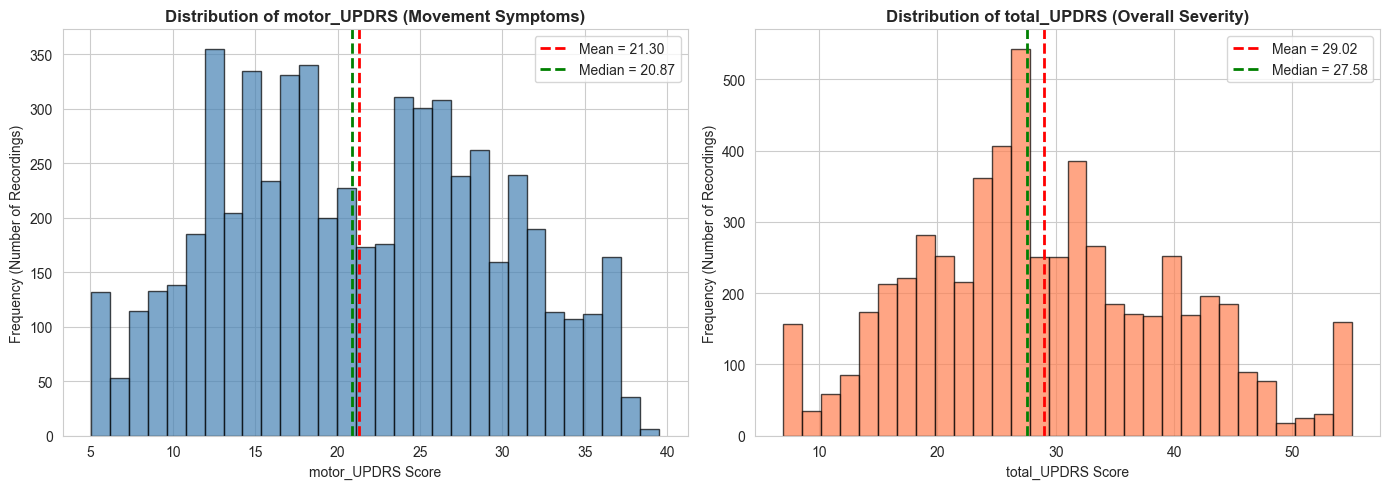


📈 TARGET VARIABLE STATISTICS:
motor_UPDRS:  Range = [5.04, 39.51], Mean = 21.30, Std = 8.13
total_UPDRS:  Range = [7.00, 54.99], Mean = 29.02, Std = 10.70

💡 Insight: Both targets are approximately normally distributed (mean ≈ median), which is good for regression models!


In [7]:
# ============================================================
# SECTION 7: TARGET VARIABLES ANALYSIS
# ============================================================
# What we're doing: Analyzing the two target variables we want to predict
# - motor_UPDRS: Movement symptoms score (0-108 scale)
# - total_UPDRS: Overall disease severity (0-176 scale)
# 
# Why this matters: Understanding target distribution helps us:
# 1. Know the range of values to predict
# 2. Detect if targets are normally distributed (affects model choice)
# 3. Identify if there are outliers in disease scores

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# motor_UPDRS distribution
axes[0].hist(df['motor_UPDRS'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of motor_UPDRS (Movement Symptoms)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('motor_UPDRS Score')
axes[0].set_ylabel('Frequency (Number of Recordings)')
axes[0].axvline(df['motor_UPDRS'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {df["motor_UPDRS"].mean():.2f}')
axes[0].axvline(df['motor_UPDRS'].median(), color='green', linestyle='--', linewidth=2, label=f'Median = {df["motor_UPDRS"].median():.2f}')
axes[0].legend()

# total_UPDRS distribution
axes[1].hist(df['total_UPDRS'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of total_UPDRS (Overall Severity)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('total_UPDRS Score')
axes[1].set_ylabel('Frequency (Number of Recordings)')
axes[1].axvline(df['total_UPDRS'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {df["total_UPDRS"].mean():.2f}')
axes[1].axvline(df['total_UPDRS'].median(), color='green', linestyle='--', linewidth=2, label=f'Median = {df["total_UPDRS"].median():.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n📈 TARGET VARIABLE STATISTICS:")
print("="*60)
print(f"motor_UPDRS:  Range = [{df['motor_UPDRS'].min():.2f}, {df['motor_UPDRS'].max():.2f}], Mean = {df['motor_UPDRS'].mean():.2f}, Std = {df['motor_UPDRS'].std():.2f}")
print(f"total_UPDRS:  Range = [{df['total_UPDRS'].min():.2f}, {df['total_UPDRS'].max():.2f}], Mean = {df['total_UPDRS'].mean():.2f}, Std = {df['total_UPDRS'].std():.2f}")
print("\n💡 Insight: Both targets are approximately normally distributed (mean ≈ median), which is good for regression models!")

In [8]:
# ============================================================
# SECTION 8: VOICE FEATURES OVERVIEW
# ============================================================
# What we're doing: Identifying and grouping the 16 voice features
# Why: Voice features are our predictors (X variables) for regression

# Define voice feature groups
jitter_features = ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP']
shimmer_features = ['Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA']
noise_features = ['NHR', 'HNR']
complexity_features = ['RPDE', 'DFA', 'PPE']

all_voice_features = jitter_features + shimmer_features + noise_features + complexity_features

print("\n🎤 VOICE FEATURES BREAKDOWN:")
print("="*60)
print(f"\n1. Jitter Features (Pitch Variation): {len(jitter_features)} features")
print(f"   → {jitter_features}")
print(f"   → What they measure: Frequency instability (shaky voice pitch)\n")

print(f"2. Shimmer Features (Amplitude Variation): {len(shimmer_features)} features")
print(f"   → {shimmer_features}")
print(f"   → What they measure: Loudness fluctuations (weak, trembling voice)\n")

print(f"3. Noise Features: {len(noise_features)} features")
print(f"   → {noise_features}")
print(f"   → What they measure: NHR (noise ratio), HNR (harmonics ratio) - voice clarity\n")

print(f"4. Complexity Features: {len(complexity_features)} features")
print(f"   → {complexity_features}")
print(f"   → What they measure: Nonlinear dynamics and entropy (voice complexity)\n")

print(f"\n✅ Total Voice Features: {len(all_voice_features)}")


🎤 VOICE FEATURES BREAKDOWN:

1. Jitter Features (Pitch Variation): 5 features
   → ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP']
   → What they measure: Frequency instability (shaky voice pitch)

2. Shimmer Features (Amplitude Variation): 6 features
   → ['Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA']
   → What they measure: Loudness fluctuations (weak, trembling voice)

3. Noise Features: 2 features
   → ['NHR', 'HNR']
   → What they measure: NHR (noise ratio), HNR (harmonics ratio) - voice clarity

4. Complexity Features: 3 features
   → ['RPDE', 'DFA', 'PPE']
   → What they measure: Nonlinear dynamics and entropy (voice complexity)


✅ Total Voice Features: 16


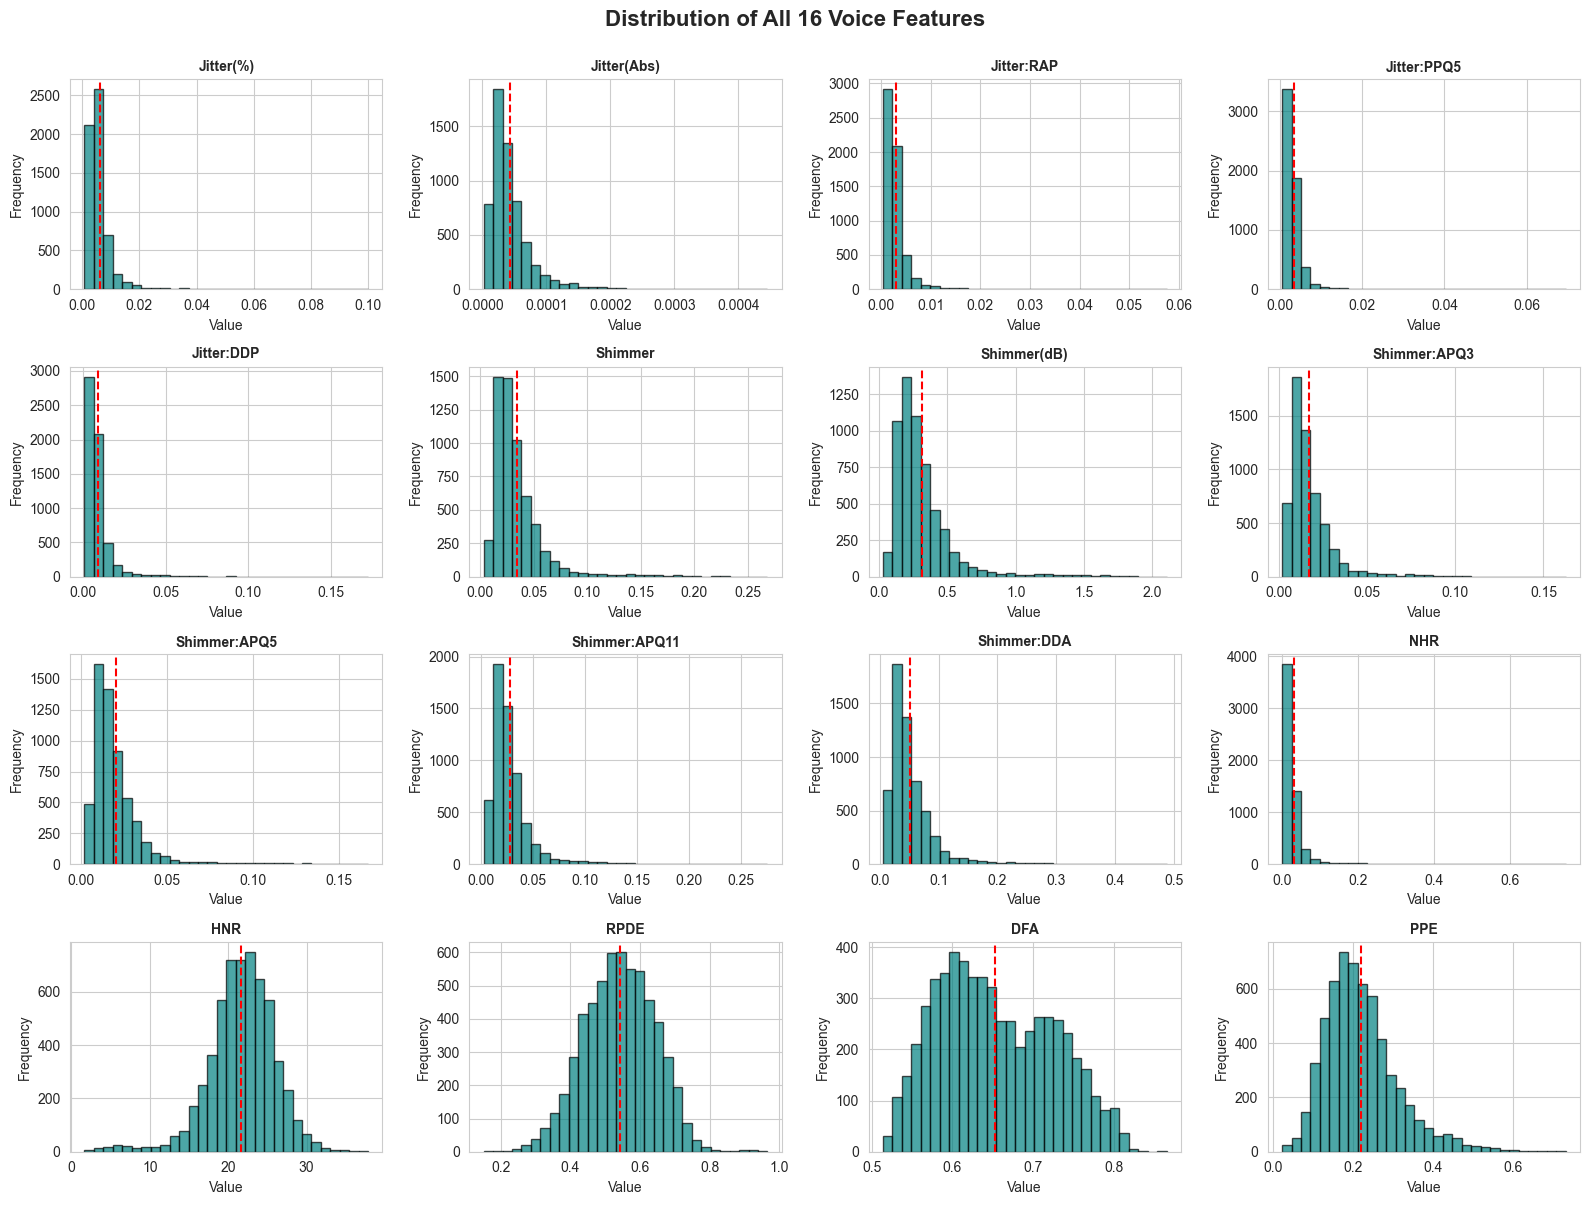


💡 Key Observations to Look For:
- Are distributions bell-shaped (normal) or skewed?
- Are there extreme outliers in any feature?
- Notice the HUGE scale differences → we'll need StandardScaler!


In [9]:
# ============================================================
# SECTION 9: VOICE FEATURES DISTRIBUTIONS
# ============================================================
# What we're doing: Visualizing the distribution of all 16 voice features
# Why: Need to check for:
# - Outliers (extreme values that could skew models)
# - Skewness (are features normally distributed?)
# - Scale differences (e.g., Jitter ~0.005 vs HNR ~21 → need scaling!)

fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(all_voice_features):
    axes[i].hist(df[feature], bins=30, color='teal', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{feature}', fontsize=10, fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    
    # Add mean line
    axes[i].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=1.5)

plt.suptitle('Distribution of All 16 Voice Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n💡 Key Observations to Look For:")
print("- Are distributions bell-shaped (normal) or skewed?")
print("- Are there extreme outliers in any feature?")
print("- Notice the HUGE scale differences → we'll need StandardScaler!")

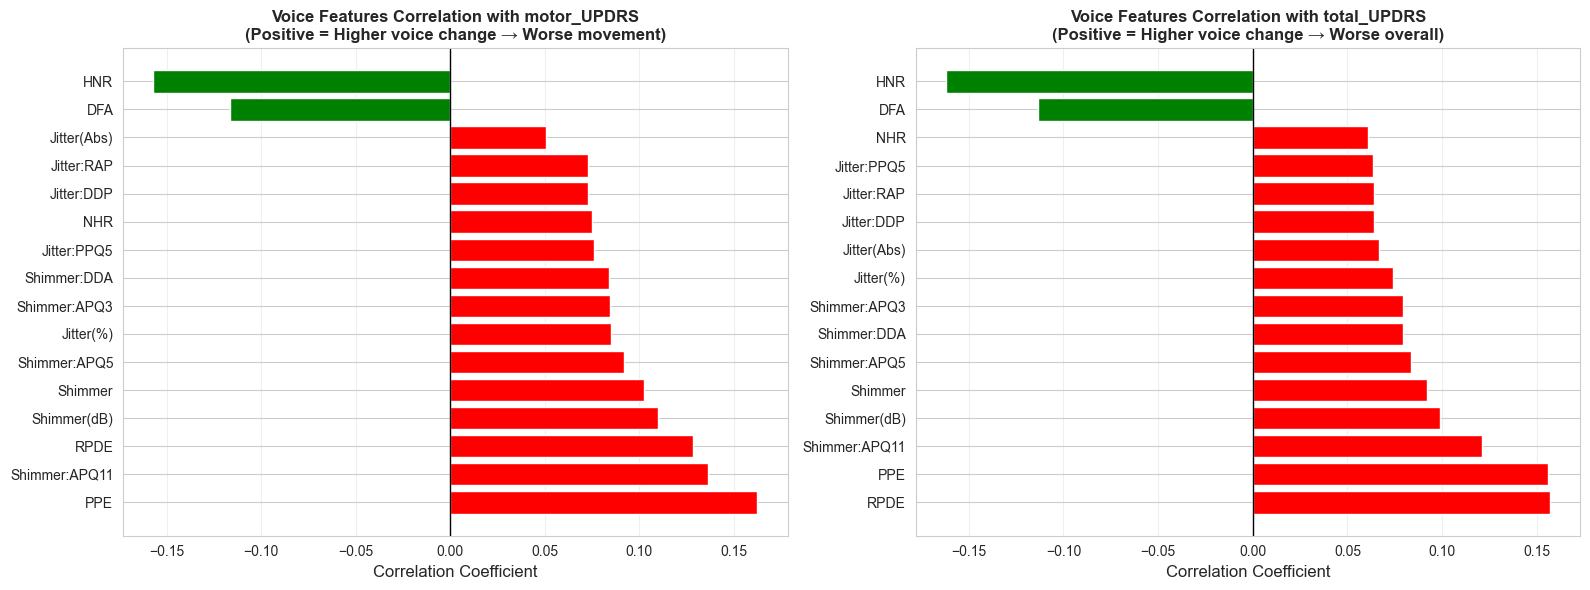


🔍 TOP 5 FEATURES CORRELATED WITH motor_UPDRS:
1. PPE                  → r = +0.162
2. Shimmer:APQ11        → r = +0.137
3. RPDE                 → r = +0.129
4. Shimmer(dB)          → r = +0.110
5. Shimmer              → r = +0.102

🔍 TOP 5 FEATURES CORRELATED WITH total_UPDRS:
1. RPDE                 → r = +0.157
2. PPE                  → r = +0.156
3. Shimmer:APQ11        → r = +0.121
4. Shimmer(dB)          → r = +0.099
5. Shimmer              → r = +0.092

💡 Interpretation Guide:
- r > +0.3: Feature increases as disease worsens (e.g., more jitter = worse symptoms)
- r < -0.3: Feature decreases as disease worsens (e.g., lower HNR = worse symptoms)
- |r| > 0.5: STRONG predictor
- |r| < 0.2: WEAK predictor


In [10]:
# ============================================================
# SECTION 10: CORRELATION ANALYSIS - WHICH FEATURES PREDICT UPDRS?
# ============================================================
# What we're doing: Computing correlation coefficients between voice features and UPDRS scores
# Why: Identify which voice features are MOST related to disease severity
# 
# What we're looking for:
# - Positive correlation: Higher feature value → Higher UPDRS (worse disease)
# - Negative correlation: Higher feature value → Lower UPDRS (better condition)
# - Strong correlation: |r| > 0.5 (feature is important for prediction)
# - Weak correlation: |r| < 0.2 (feature may not be useful)

# Calculate correlations
correlation_motor = df[all_voice_features + ['motor_UPDRS']].corr()['motor_UPDRS'].drop('motor_UPDRS').sort_values(ascending=False)
correlation_total = df[all_voice_features + ['total_UPDRS']].corr()['total_UPDRS'].drop('total_UPDRS').sort_values(ascending=False)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# motor_UPDRS correlations
axes[0].barh(correlation_motor.index, correlation_motor.values, color=['green' if x < 0 else 'red' for x in correlation_motor.values])
axes[0].set_xlabel('Correlation Coefficient', fontsize=12)
axes[0].set_title('Voice Features Correlation with motor_UPDRS\n(Positive = Higher voice change → Worse movement)', fontsize=12, fontweight='bold')
axes[0].axvline(0, color='black', linewidth=1)
axes[0].grid(axis='x', alpha=0.3)

# total_UPDRS correlations
axes[1].barh(correlation_total.index, correlation_total.values, color=['green' if x < 0 else 'red' for x in correlation_total.values])
axes[1].set_xlabel('Correlation Coefficient', fontsize=12)
axes[1].set_title('Voice Features Correlation with total_UPDRS\n(Positive = Higher voice change → Worse overall)', fontsize=12, fontweight='bold')
axes[1].axvline(0, color='black', linewidth=1)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 TOP 5 FEATURES CORRELATED WITH motor_UPDRS:")
print("="*60)
for i, (feature, corr) in enumerate(correlation_motor.head(5).items(), 1):
    print(f"{i}. {feature:20s} → r = {corr:+.3f}")

print("\n🔍 TOP 5 FEATURES CORRELATED WITH total_UPDRS:")
print("="*60)
for i, (feature, corr) in enumerate(correlation_total.head(5).items(), 1):
    print(f"{i}. {feature:20s} → r = {corr:+.3f}")

print("\n💡 Interpretation Guide:")
print("- r > +0.3: Feature increases as disease worsens (e.g., more jitter = worse symptoms)")
print("- r < -0.3: Feature decreases as disease worsens (e.g., lower HNR = worse symptoms)")
print("- |r| > 0.5: STRONG predictor")
print("- |r| < 0.2: WEAK predictor")

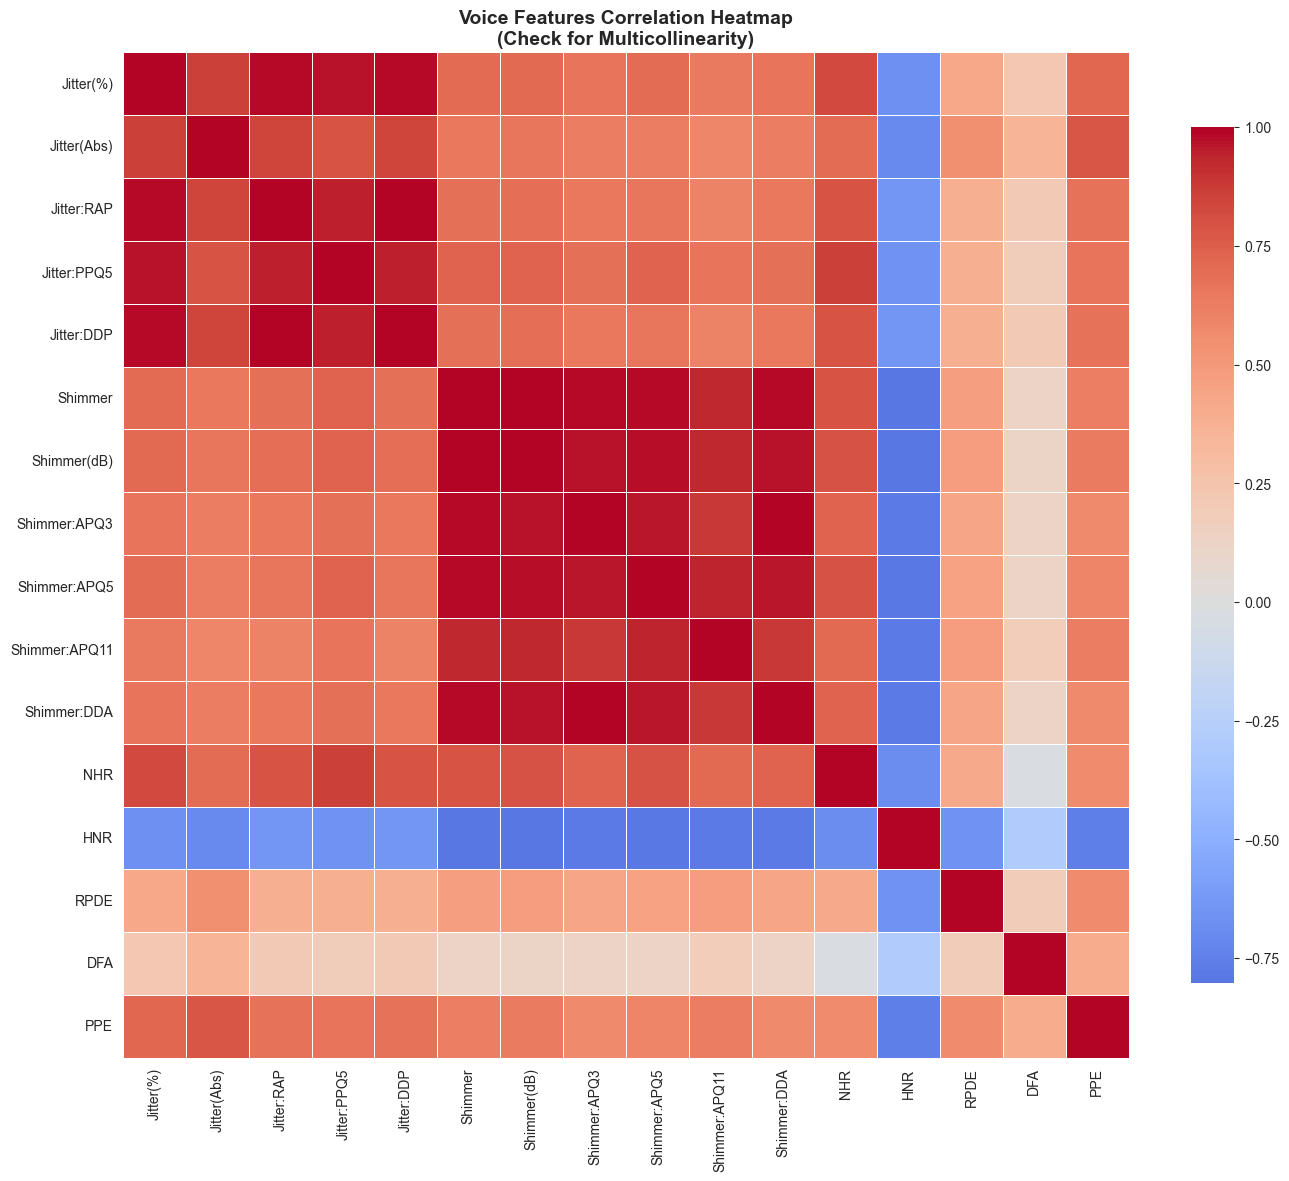


⚠️ HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.8):
Jitter(%) ↔ Jitter(Abs): r = 0.866
Jitter(%) ↔ Jitter:RAP: r = 0.984
Jitter(%) ↔ Jitter:PPQ5: r = 0.968
Jitter(%) ↔ Jitter:DDP: r = 0.984
Jitter(%) ↔ NHR: r = 0.825
Jitter(Abs) ↔ Jitter:RAP: r = 0.845
Jitter(Abs) ↔ Jitter:DDP: r = 0.845
Jitter:RAP ↔ Jitter:PPQ5: r = 0.947
Jitter:RAP ↔ Jitter:DDP: r = 1.000
Jitter:PPQ5 ↔ Jitter:DDP: r = 0.947
Jitter:PPQ5 ↔ NHR: r = 0.865
Shimmer ↔ Shimmer(dB): r = 0.992
Shimmer ↔ Shimmer:APQ3: r = 0.980
Shimmer ↔ Shimmer:APQ5: r = 0.985
Shimmer ↔ Shimmer:APQ11: r = 0.935
Shimmer ↔ Shimmer:DDA: r = 0.980
Shimmer ↔ HNR: r = -0.801
Shimmer(dB) ↔ Shimmer:APQ3: r = 0.968
Shimmer(dB) ↔ Shimmer:APQ5: r = 0.976
Shimmer(dB) ↔ Shimmer:APQ11: r = 0.936
Shimmer(dB) ↔ Shimmer:DDA: r = 0.968
Shimmer(dB) ↔ HNR: r = -0.802
Shimmer:APQ3 ↔ Shimmer:APQ5: r = 0.963
Shimmer:APQ3 ↔ Shimmer:APQ11: r = 0.886
Shimmer:APQ3 ↔ Shimmer:DDA: r = 1.000
Shimmer:APQ5 ↔ Shimmer:APQ11: r = 0.939
Shimmer:APQ5 ↔ Shimmer:DDA: r = 0.963
Shimme

In [11]:
# ============================================================
# SECTION 11: FEATURE CORRELATION HEATMAP (MULTICOLLINEARITY CHECK)
# ============================================================
# What we're doing: Creating a heatmap showing correlations BETWEEN voice features
# Why: High correlation between features (multicollinearity) can cause problems:
# - Linear Regression coefficients become unstable
# - Feature importance becomes unreliable
# - Models may overfit
# 
# What to look for:
# - Dark red/blue squares = high correlation (|r| > 0.8)
# - Example: Jitter(%) might be highly correlated with Jitter(Abs)
# - Solution: Use Random Forest (handles multicollinearity) or remove redundant features

plt.figure(figsize=(14, 12))
correlation_matrix = df[all_voice_features].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Voice Features Correlation Heatmap\n(Check for Multicollinearity)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify highly correlated pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("\n⚠️ HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.8):")
print("="*60)
if high_corr_pairs:
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} ↔ {feat2}: r = {corr:.3f}")
    print("\n💡 Solution: Random Forest handles this well (feature randomization), but Linear Regression might struggle!")
else:
    print("✅ No extreme multicollinearity detected!")

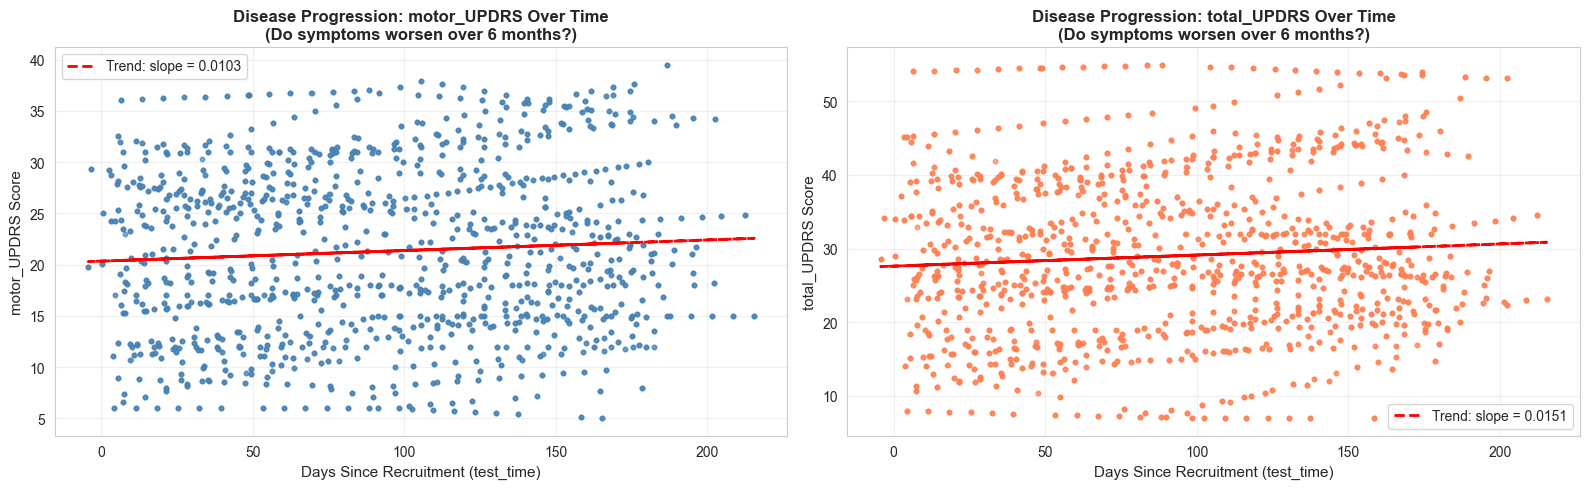


📊 PROGRESSION ANALYSIS:
motor_UPDRS: Slope = +0.0103 points/day (+0.31 points/month)
total_UPDRS: Slope = +0.0151 points/day (+0.45 points/month)

💡 Positive slope confirms disease progression (UPDRS increases over time)


In [12]:
# ============================================================
# SECTION 12: DISEASE PROGRESSION OVER TIME
# ============================================================
# What we're doing: Analyzing how UPDRS scores change over the 6-month trial
# Why: Parkinson's is progressive (gets worse over time)
# 
# What we expect:
# - Upward trend: UPDRS increases as test_time increases
# - Validates that voice features track disease progression

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# motor_UPDRS over time
axes[0].scatter(df['test_time'], df['motor_UPDRS'], alpha=0.3, s=10, color='steelblue')
axes[0].set_xlabel('Days Since Recruitment (test_time)', fontsize=11)
axes[0].set_ylabel('motor_UPDRS Score', fontsize=11)
axes[0].set_title('Disease Progression: motor_UPDRS Over Time\n(Do symptoms worsen over 6 months?)', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Add trend line
z = np.polyfit(df['test_time'], df['motor_UPDRS'], 1)
p = np.poly1d(z)
axes[0].plot(df['test_time'], p(df['test_time']), "r--", linewidth=2, label=f'Trend: slope = {z[0]:.4f}')
axes[0].legend()

# total_UPDRS over time
axes[1].scatter(df['test_time'], df['total_UPDRS'], alpha=0.3, s=10, color='coral')
axes[1].set_xlabel('Days Since Recruitment (test_time)', fontsize=11)
axes[1].set_ylabel('total_UPDRS Score', fontsize=11)
axes[1].set_title('Disease Progression: total_UPDRS Over Time\n(Do symptoms worsen over 6 months?)', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

# Add trend line
z2 = np.polyfit(df['test_time'], df['total_UPDRS'], 1)
p2 = np.poly1d(z2)
axes[1].plot(df['test_time'], p2(df['test_time']), "r--", linewidth=2, label=f'Trend: slope = {z2[0]:.4f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n📊 PROGRESSION ANALYSIS:")
print("="*60)
print(f"motor_UPDRS: Slope = {z[0]:+.4f} points/day ({z[0]*30:+.2f} points/month)")
print(f"total_UPDRS: Slope = {z2[0]:+.4f} points/day ({z2[0]*30:+.2f} points/month)")

if z[0] > 0:
    print("\n💡 Positive slope confirms disease progression (UPDRS increases over time)")
else:
    print("\n⚠️ Unexpected: Negative slope (disease improving? or medication effect?)")

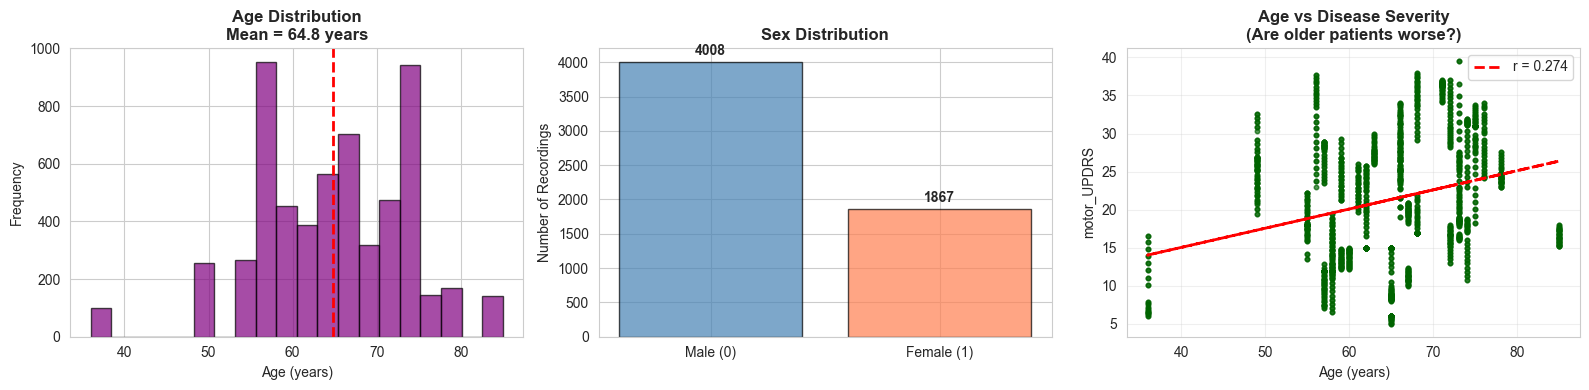


👥 DEMOGRAPHICS SUMMARY:
Age: Mean = 64.8 years, Range = [36, 85]
Sex: Male = 4008 recordings, Female = 1867 recordings
Age-UPDRS Correlation: r = 0.274

💡 Positive correlation: Older patients tend to have worse symptoms (expected!)


In [13]:
# ============================================================
# SECTION 13: PATIENT DEMOGRAPHICS ANALYSIS
# ============================================================
# What we're doing: Analyzing age and sex distributions
# Why: Age and gender affect voice characteristics
# - Older patients may have higher baseline UPDRS
# - Men have lower pitch (different voice features)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Age distribution
axes[0].hist(df['age'], bins=20, color='purple', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Age Distribution\nMean = {df["age"].mean():.1f} years', fontweight='bold')
axes[0].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2)

# Sex distribution
sex_counts = df['sex'].value_counts()
axes[1].bar(['Male (0)', 'Female (1)'], sex_counts.values, color=['steelblue', 'coral'], edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Number of Recordings')
axes[1].set_title('Sex Distribution', fontweight='bold')
for i, v in enumerate(sex_counts.values):
    axes[1].text(i, v + 100, str(v), ha='center', fontweight='bold')

# Age vs motor_UPDRS
axes[2].scatter(df['age'], df['motor_UPDRS'], alpha=0.3, s=10, color='darkgreen')
axes[2].set_xlabel('Age (years)')
axes[2].set_ylabel('motor_UPDRS')
axes[2].set_title('Age vs Disease Severity\n(Are older patients worse?)', fontweight='bold')
axes[2].grid(alpha=0.3)

# Add trend line
z_age = np.polyfit(df['age'], df['motor_UPDRS'], 1)
p_age = np.poly1d(z_age)
axes[2].plot(df['age'], p_age(df['age']), "r--", linewidth=2, label=f'r = {df[["age", "motor_UPDRS"]].corr().iloc[0,1]:.3f}')
axes[2].legend()

plt.tight_layout()
plt.show()

print("\n👥 DEMOGRAPHICS SUMMARY:")
print("="*60)
print(f"Age: Mean = {df['age'].mean():.1f} years, Range = [{df['age'].min():.0f}, {df['age'].max():.0f}]")
print(f"Sex: Male = {sex_counts[0]} recordings, Female = {sex_counts[1]} recordings")
print(f"Age-UPDRS Correlation: r = {df[['age', 'motor_UPDRS']].corr().iloc[0,1]:.3f}")

if df[['age', 'motor_UPDRS']].corr().iloc[0,1] > 0.2:
    print("\n💡 Positive correlation: Older patients tend to have worse symptoms (expected!)")
else:
    print("\n💡 Weak age effect: Disease severity not strongly related to age in this cohort")

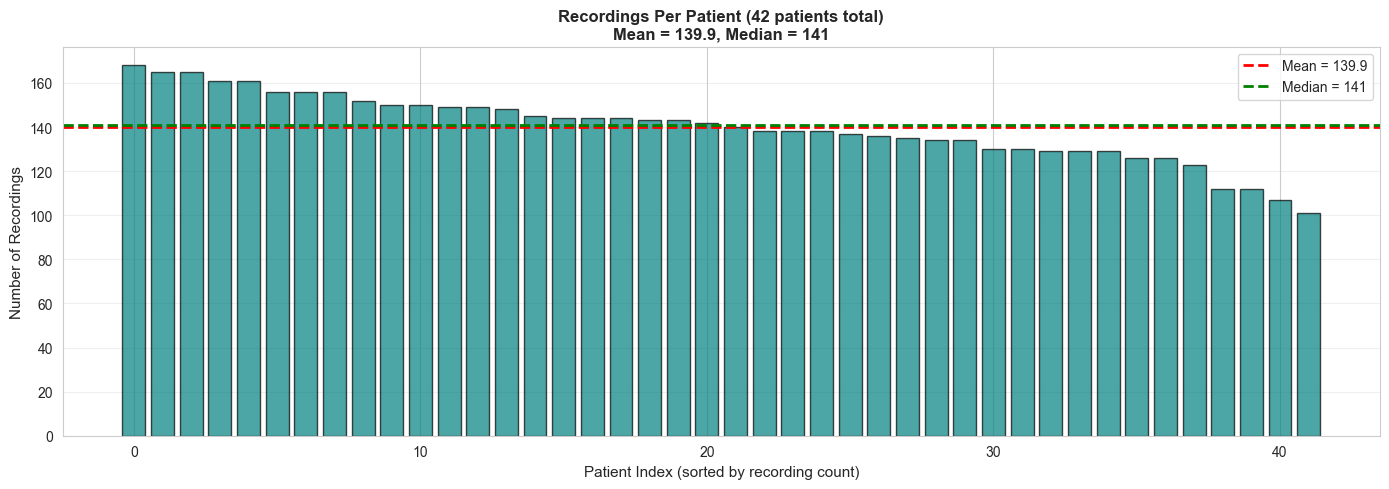


📊 PER-PATIENT RECORDING STATISTICS:
Total Patients: 42
Total Recordings: 5875
Recordings per patient: Mean = 139.9, Median = 141
Range: Min = 101, Max = 168

⚠️ IMPORTANT: Some patients have 168 recordings, others have 101!
💡 Implication: Random train/test split may put same patient in both sets → data leakage risk!
💡 Better approach: Patient-based split (some patients in train, others in test)


In [14]:
# ============================================================
# SECTION 14: PER-PATIENT RECORDINGS COUNT
# ============================================================
# What we're doing: Counting how many recordings each of the 42 patients contributed
# Why: Important for understanding data structure
# - Unequal recordings → some patients over-represented
# - Affects train/test split strategy (should we split by patient?)

patient_counts = df.groupby('subject#').size().sort_values(ascending=False)

plt.figure(figsize=(14, 5))
plt.bar(range(len(patient_counts)), patient_counts.values, color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Patient Index (sorted by recording count)', fontsize=11)
plt.ylabel('Number of Recordings', fontsize=11)
plt.title(f'Recordings Per Patient (42 patients total)\nMean = {patient_counts.mean():.1f}, Median = {patient_counts.median():.0f}', 
          fontsize=12, fontweight='bold')
plt.axhline(patient_counts.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {patient_counts.mean():.1f}')
plt.axhline(patient_counts.median(), color='green', linestyle='--', linewidth=2, label=f'Median = {patient_counts.median():.0f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 PER-PATIENT RECORDING STATISTICS:")
print("="*60)
print(f"Total Patients: {len(patient_counts)}")
print(f"Total Recordings: {patient_counts.sum()}")
print(f"Recordings per patient: Mean = {patient_counts.mean():.1f}, Median = {patient_counts.median():.0f}")
print(f"Range: Min = {patient_counts.min()}, Max = {patient_counts.max()}")
print(f"\n⚠️ IMPORTANT: Some patients have {patient_counts.max()} recordings, others have {patient_counts.min()}!")
print("💡 Implication: Random train/test split may put same patient in both sets → data leakage risk!")
print("💡 Better approach: Patient-based split (some patients in train, others in test)")

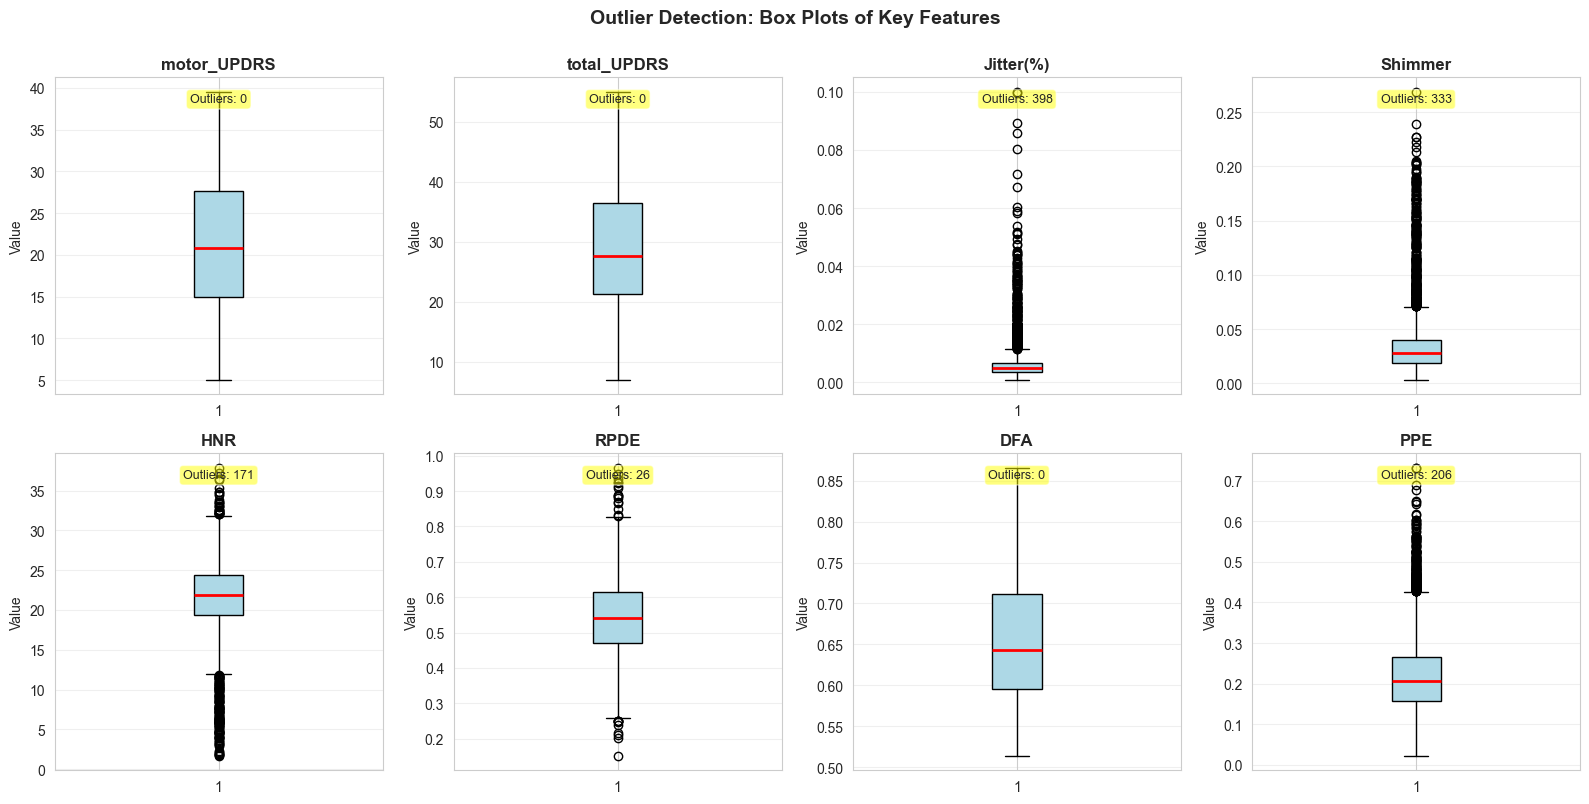


💡 How to Interpret Box Plots:
- Box = Middle 50% of data (25th to 75th percentile)
- Red line = Median (50th percentile)
- Whiskers = Typical range (1.5 × IQR beyond box)
- Dots = Outliers (unusual values)

⚠️ Decision: Keep outliers (they may represent real disease states) but use robust models like Random Forest!


In [15]:
# ============================================================
# SECTION 15: OUTLIER DETECTION (BOX PLOTS)
# ============================================================
# What we're doing: Visualizing outliers using box plots for key features
# Why: Outliers can:
# - Skew model training (especially Linear Regression)
# - Indicate measurement errors
# - Represent rare disease states
# 
# Box plot interpretation:
# - Box: 25th to 75th percentile (middle 50% of data)
# - Line in box: Median
# - Whiskers: 1.5 × IQR (interquartile range)
# - Dots: Outliers beyond whiskers

key_features = ['motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Shimmer', 'HNR', 'RPDE', 'DFA', 'PPE']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    axes[i].boxplot(df[feature].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    medianprops=dict(color='red', linewidth=2))
    axes[i].set_title(f'{feature}', fontweight='bold')
    axes[i].set_ylabel('Value')
    axes[i].grid(axis='y', alpha=0.3)
    
    # Count outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)][feature]
    axes[i].text(0.5, 0.95, f'Outliers: {len(outliers)}', transform=axes[i].transAxes, 
                ha='center', va='top', fontsize=9, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.suptitle('Outlier Detection: Box Plots of Key Features', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n💡 How to Interpret Box Plots:")
print("- Box = Middle 50% of data (25th to 75th percentile)")
print("- Red line = Median (50th percentile)")
print("- Whiskers = Typical range (1.5 × IQR beyond box)")
print("- Dots = Outliers (unusual values)")
print("\n⚠️ Decision: Keep outliers (they may represent real disease states) but use robust models like Random Forest!")

In [16]:
# ============================================================
# SECTION 16: EDA SUMMARY & KEY FINDINGS
# ============================================================
# What we discovered: Summary of all exploratory analysis

print("\n" + "="*70)
print("📋 EXPLORATORY DATA ANALYSIS - SUMMARY REPORT")
print("="*70)

print("\n1️⃣ DATASET OVERVIEW:")
print(f"   - Total recordings: {len(df):,}")
print(f"   - Unique patients: {df['subject#'].nunique()}")
print(f"   - Features: {len(all_voice_features)} voice + 4 demographic/context")
print(f"   - Targets: 2 (motor_UPDRS, total_UPDRS)")
print(f"   - Missing values: {df.isnull().sum().sum()} (✅ Clean dataset!)")

print("\n2️⃣ TARGET VARIABLES:")
print(f"   motor_UPDRS: Range [{df['motor_UPDRS'].min():.1f}, {df['motor_UPDRS'].max():.1f}], Mean = {df['motor_UPDRS'].mean():.2f}")
print(f"   total_UPDRS: Range [{df['total_UPDRS'].min():.1f}, {df['total_UPDRS'].max():.1f}], Mean = {df['total_UPDRS'].mean():.2f}")
print("   ✅ Both targets are approximately normally distributed")

print("\n3️⃣ TOP PREDICTIVE FEATURES (highest correlation with motor_UPDRS):")
for i, (feature, corr) in enumerate(correlation_motor.head(5).items(), 1):
    print(f"   {i}. {feature:20s} → r = {corr:+.3f}")

print("\n4️⃣ MULTICOLLINEARITY:")
if len(high_corr_pairs) > 0:
    print(f"   ⚠️ Found {len(high_corr_pairs)} highly correlated feature pairs (|r| > 0.8)")
    print("   💡 Solution: Use Random Forest (handles multicollinearity) or remove redundant features")
else:
    print("   ✅ No extreme multicollinearity detected")

print("\n5️⃣ DISEASE PROGRESSION:")
print(f"   motor_UPDRS trend: {z[0]:+.4f} points/day ({z[0]*30:+.2f} points/month)")
print(f"   total_UPDRS trend: {z2[0]:+.4f} points/day ({z2[0]*30:+.2f} points/month)")
if z[0] > 0:
    print("   ✅ Positive slope confirms disease progression over time")

print("\n6️⃣ DEMOGRAPHICS:")
print(f"   Age: Mean = {df['age'].mean():.1f} years, Range = [{df['age'].min():.0f}, {df['age'].max():.0f}]")
print(f"   Sex: {sex_counts[0]} male recordings, {sex_counts[1]} female recordings")
print(f"   Age-UPDRS correlation: r = {df[['age', 'motor_UPDRS']].corr().iloc[0,1]:.3f}")

print("\n7️⃣ DATA CHALLENGES:")
print(f"   ⚠️ Recordings per patient vary: {patient_counts.min()} to {patient_counts.max()}")
print("   ⚠️ Same patient in train/test → data leakage risk")
print("   ⚠️ Feature scales differ widely (Jitter ~0.005 vs HNR ~21) → need StandardScaler")

print("\n8️⃣ RECOMMENDATIONS FOR MODELING:")
print("   ✅ Use StandardScaler to normalize all voice features")
print("   ✅ Consider patient-based train/test split (avoid data leakage)")
print("   ✅ Random Forest likely to perform best (handles multicollinearity + outliers)")
print("   ✅ Include age and test_time as features (both correlate with UPDRS)")
print("   ✅ Try both regression targets separately (motor_UPDRS vs total_UPDRS)")

print("\n" + "="*70)
print("✅ EDA COMPLETE! Ready to proceed to preprocessing and modeling.")
print("="*70 + "\n")


📋 EXPLORATORY DATA ANALYSIS - SUMMARY REPORT

1️⃣ DATASET OVERVIEW:
   - Total recordings: 5,875
   - Unique patients: 42
   - Features: 16 voice + 4 demographic/context
   - Targets: 2 (motor_UPDRS, total_UPDRS)
   - Missing values: 0 (✅ Clean dataset!)

2️⃣ TARGET VARIABLES:
   motor_UPDRS: Range [5.0, 39.5], Mean = 21.30
   total_UPDRS: Range [7.0, 55.0], Mean = 29.02
   ✅ Both targets are approximately normally distributed

3️⃣ TOP PREDICTIVE FEATURES (highest correlation with motor_UPDRS):
   1. PPE                  → r = +0.162
   2. Shimmer:APQ11        → r = +0.137
   3. RPDE                 → r = +0.129
   4. Shimmer(dB)          → r = +0.110
   5. Shimmer              → r = +0.102

4️⃣ MULTICOLLINEARITY:
   ⚠️ Found 28 highly correlated feature pairs (|r| > 0.8)
   💡 Solution: Use Random Forest (handles multicollinearity) or remove redundant features

5️⃣ DISEASE PROGRESSION:
   motor_UPDRS trend: +0.0103 points/day (+0.31 points/month)
   total_UPDRS trend: +0.0151 points/d